# Global Sequence Alignments
We can perform optimal global sequence alignments with a dynamic programming approach.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import sequence_alignment as seq

In [2]:
seq_2 = "AAAAATGCGCC"
seq_1 = "AAAATGCCA"

## 1. Initialization Step

First, we need to initialize an $(m+1) \times (n+1)$ matrix and assign gap penalties. We will call this matrix the scoring matrix $(M)$. <br>
*Note:* We will start off with linear gap penalties and modify the approach for affine penalties in another notebook.

In [3]:
m = len(seq_1); n = len(seq_2)
M = np.zeros([m+1,n+1])

Let's specify a gap penalty $g$.

In [4]:
g = -6

$M$ is initialized as: <br>
$$ M_{(0,0)} = 0 $$ <br>
$$ M_{(0,j)} = gj \ \forall j>0 $$ <br>
$$ M_{(i,0)} = gi \ \forall i>0 $$

In [5]:
#initialize the matrix
M[0,:] = g*np.arange(0,n+1)
M[:,0] = g*np.arange(0,m+1)

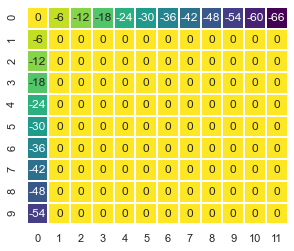

In [6]:
sns.heatmap(M,linecolor='white',linewidth=1,cmap="viridis",square=True,annot=True,cbar=False);

As you can see, the initialized matrix has linearly decreasing scores along the first row and first column.

## 2. Fill Step
To fill the matrix with scores, we need to iterate over the elements of the matrix and fill in values according to the following recursive relation:

$$ M_{i,j} = \max \{ (M_{i-1,j-1} + S_{i,j}), \ (M_{i-1,j} + g), \ (M_{i,j-1} + g) \} $$

Where $M$ is the scoring matrix, $S$ is the substitution matrix and $g$ is the gap penalty.

### Substitution Matrix
Consider the following substition matrix for DNA sequences.

In [7]:
S = pd.read_csv('dna_transition_transversion.csv',index_col=0)
S

,A,G,C,T
A,2.0,-5.0,-7.0,-7.0
G,-5.0,2.0,-7.0,-7.0
C,-7.0,-7.0,2.0,-5.0
T,-7.0,-7.0,-5.0,2.0


In [8]:
tracer = np.zeros([np.shape(M)[0],np.shape(M)[1],3])
for i in range(1,m+1):
    for j in range(1,n+1):
        arr = np.array([M[i-1,j-1]+(S[seq_1[i-1]][seq_2[j-1]]),(M[i-1,j]+g),(M[i,j-1]+g)])
        M[i,j] = np.max(arr)
        idx = np.where(arr==np.max(arr))
        tracer[i,j,idx] = 1

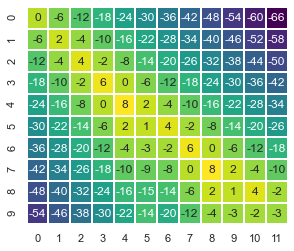

In [9]:
sns.heatmap(M,linecolor='white',linewidth=1,cmap="viridis",square=True,annot=True,cbar=False);

For every element in the above matrix, as we were filling up, we recorded the traceback direction in a 3D matrix called `tracer`. Let's visualize the three channels of the `tracer` matrix: $\nwarrow$, $\uparrow$ and $\leftarrow$ 

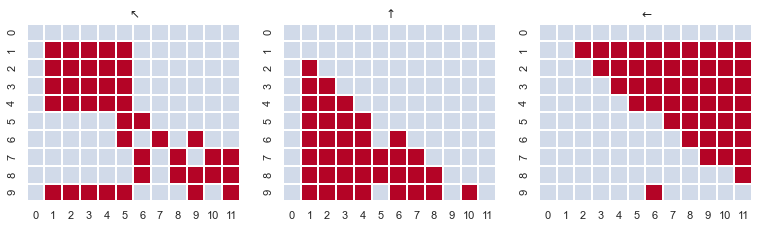

In [10]:
fig, ax = plt.subplots(1,3,figsize = (13,6))
for i,p in enumerate([r"$\nwarrow$",r"$\uparrow$",r"$\leftarrow$"]):
        sns.heatmap(tracer[:,:,i],linecolor='white',linewidth=1,
                    cmap="coolwarm",vmin=-0.5,vmax=0.6,square=True,cbar=False,ax=ax[i]);
        ax[i].set_title(p)

## 3. Traceback
When we pass `tracer` to the `traceback` function, it constructs 2x2 blocks iteratively from the 3 channels shown above and moves the block along the direction specified by the arrows.

In [11]:
alignment = seq.traceback_iterator(tracer,seq_1,seq_2)
for i,e in enumerate(alignment):
    print(str(i+1)+".","\n",e[0],"\n",e[1],"\n")

1. 
 -AAAATGC-CA 
 AAAAATGCGCC 

2. 
 AAA-ATGC-CA 
 AAAAATGCGCC 

3. 
 AAAA-TGC-CA 
 AAAAATGCGCC 

4. 
 A-AAATGC-CA 
 AAAAATGCGCC 

5. 
 AA-AATGC-CA 
 AAAAATGCGCC 



There are atleast 5 possible optimal alignments for the sequences `AAAAATGCGCC` and `AAAATGCCA`.

## 4. Example Alignments

Let's align some more sequences.

### 1.

In [12]:
seq_2 = "AAATTGCGCAAAATCTACTACGCGCGCGA"
seq_1 = "AAATTGCGCAAAATCTTACGCGCCCTACGCGA"

In [13]:
_,_,_ = seq.global_dp(seq_1,seq_2,S,g,disp_alignments=True,max_i=200)

Max. score = 12.0
1. 
 AAATTGCGCAAAATCT--TACGCGCCCTACGCGA 
 AAATTGCGCAAAATCTACTACGCG-C----GCGA 

2. 
 AAATTGCGCAAAATCTTAC-GCGCCCTACGCGA 
 AAATTGCGCAAAATCT-ACTACG--C-GCGCGA 

3. 
 AAATTGCGCAAAATCTTAC-GCGCCCTACGCGA 
 AAATTGCGCAAAATCT-ACTACG-C--GCGCGA 

4. 
 AAATTGCGCAAAATCTTAC-GCGCCCTACGCGA 
 AAATTGCGCAAAATCT-ACTACGC---GCGCGA 

5. 
 AAATTGCGCAAAATCT--TACGCGCCCTACGCGA 
 AAATTGCGCAAAATCTACTACGCG-----CGCGA 

6. 
 AAATTGCGCAAAATCT--TACGCGCCCTACGCGA 
 AAATTGCGCAAAATCTACTACGCGC-----GCGA 

7. 
 AAATTGCGCAAAATCTTAC-GCGCCCTACGCGA 
 AAATTGCGCAAAATC-TACTACG--C-GCGCGA 

8. 
 AAATTGCGCAAAATCTTAC-GCGCCCTACGCGA 
 AAATTGCGCAAAATC-TACTACG-C--GCGCGA 

9. 
 AAATTGCGCAAAATCT--TACGCGCCCTACGCGA 
 AAATTGCGCAAAATCTACTACGCG--C---GCGA 

10. 
 AAATTGCGCAAAATCTTAC-GCGCCCTACGCGA 
 AAATTGCGCAAAATC-TACTACGC---GCGCGA 



### 2.

In [14]:
seq_2 = "ATCCCCGGGGGGGCTCTCTC"
seq_1 = "AT"

In [15]:
_,_,_ = seq.global_dp(seq_1,seq_2,S,g,disp_alignments=True)

Max. score = -104.0
1. 
 A-----------------T- 
 ATCCCCGGGGGGGCTCTCTC 

2. 
 AT------------------ 
 ATCCCCGGGGGGGCTCTCTC 

3. 
 A---------------T--- 
 ATCCCCGGGGGGGCTCTCTC 

4. 
 A-------------T----- 
 ATCCCCGGGGGGGCTCTCTC 

